In [ ]:
 !git clone https://github.com/jermwatt/machine_learning_refined

Cloning into 'machine_learning_refined'...
remote: Enumerating objects: 30391, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 30391 (delta 0), reused 0 (delta 0), pack-reused 30387
Receiving objects: 100% (30391/30391), 544.90 MiB | 26.15 MiB/s, done.
Resolving deltas: 100% (8416/8416), done.
Checking out files: 100% (1577/1577), done.


In [ ]:
import sys
sys.path.insert(0,'/content/machine_learning_refined')
import mlrefined_libraries

In [ ]:
import autograd.numpy as np
from mlrefined_libraries import nonlinear_superlearn_library as nonlib
from mlrefined_libraries import multilayer_perceptron_library as multi
from mlrefined_libraries import math_optimization_library as optlib
basic_runner = nonlib.basic_runner
regress_plotter = nonlib.nonlinear_regression_demos
classif_plotter = nonlib.nonlinear_classification_demos
static_plotter = optlib.static_plotter.Visualizer()

In [ ]:
# create initial weights for arbitrary feedforward network
def initialize_network_weights(layer_sizes, scale):
    # container for entire weight tensor
    weights = []
    
    # loop over desired layer sizes and create appropriately sized initial 
    # weight matrix for each layer
    for k in range(len(layer_sizes)-1):
        # get layer sizes for current weight matrix
        U_k = layer_sizes[k]
        U_k_plus_1 = layer_sizes[k+1]

        # make weight matrix
        weight = scale*np.random.randn(U_k+1,U_k_plus_1)
        weights.append(weight)

    # re-express weights so that w_init[0] = omega_inner contains all 
    # internal weight matrices, and w_init = w contains weights of 
    # final linear combination in predict function
    w_init = [weights[:-1],weights[-1]]
    
    return w_init

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
import pandas as pd

Mounted at /content/gdrive


In [ ]:
datapath = '/content/gdrive/My Drive/sample data/'

# 13.4

In [ ]:
# import basic plotting mechanisms
import matplotlib.pyplot as plt
from matplotlib import gridspec

# This is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True
%matplotlib inline

# autoreload function - so if anything behind the scenes is changeed those changes
# are reflected in the notebook without having to restart the kernel
%load_ext autoreload
%autoreload 2

In [ ]:
pd.read_csv('/content/gdrive/My Drive/sample data/universal_autoencoder_samples.csv')

,-2.073755115674547955e+00,-2.158174454635545469e+00,-2.121063295320279263e+00,-1.812455755858058071e+00,-1.915910937913567702e+00,-2.080860103061006772e+00,-2.290953982952684598e+00,-2.005456844519203585e+00,-2.107658102206602102e+00,-1.963689238322229302e+00,-2.175558882284733819e+00,-2.098442459802236648e+00,-2.105986338968980576e+00,-2.295344648150740241e+00,-2.208466303985164192e+00,-1.992964607832862001e+00,-2.130510704474131600e+00,-2.175073155024260796e+00,-2.170323771248898748e+00,-2.095071500352624572e+00,-2.023143406608504780e+00,-1.925778449600381137e+00,-1.989291825013542070e+00,-2.237960540665168363e+00,-2.273031546598011321e+00,-2.201313949670721914e+00,-2.169123743457399112e+00,-2.133911624888080727e+00,-2.109083870298584795e+00,-2.031849421931222199e+00,-2.010715177233092898e+00,-2.269279508407616941e+00,-2.073171377050689657e+00,-2.218936885879554399e+00,-2.056865046220102577e+00,-2.091887572084171421e+00,-2.212190524433562455e+00,-2.277786412440938157e+00,-2.042326111690584423e+00,-2.214961755500626683e+00,...,-2.064037567339349177e+00,-2.069743378304651493e+00,-1.957636682103779835e+00,-1.909705222179140627e+00,-2.031035469217987277e+00,-2.127368070807852618e+00,-1.903183249544424305e+00,-2.230612708292254887e+00,-2.085557287353363431e+00,-1.920053732693822290e+00,-2.123192997616530686e+00,-1.921162615324834677e+00,-2.124344101753568470e+00,-2.268024393289781226e+00,-2.115443636566614494e+00,-2.231865238397037210e+00,-2.038647041404146876e+00,-2.295548346537254591e+00,-2.097264002311313824e+00,-2.160882549962253929e+00,-2.104598399718761836e+00,-2.098666516670503412e+00,-2.170205748932669820e+00,-2.200697845355096050e+00,-2.023633431349700196e+00,-2.035967704285455593e+00,-1.889276867593528086e+00,-2.201682912410333870e+00,-2.145672961949481206e+00,-2.233665110432597523e+00,-2.052219716549243511e+00,-1.937000338845195957e+00,-2.035428799681558321e+00,-1.968019077890081903e+00,-2.138751918848647904e+00,-2.006947900669907359e+00,-1.956297715921022862e+00,-2.259284409858698606e+00,-2.015403697062032595e+00,-2.266817926406314410e+00
0,-0.112116,-0.205322,-0.140671,-0.249152,-0.37526,-0.121951,-0.478246,-0.583978,-0.131229,-0.5066,-0.169812,-0.134936,-0.159603,-0.347895,-0.559937,-0.554448,-0.59814,-0.175417,-0.198386,-0.603353,-0.073461,-0.422653,-0.511018,-0.511632,-0.323965,-0.231451,-0.59161,-0.600401,-0.14197,-0.59321,-0.570478,-0.462245,-0.63005,-0.532991,-0.606654,-0.623185,-0.582282,-0.505085,-0.082309,-0.214953,...,-0.107868,-0.123705,-0.46888,-0.444999,-0.603282,-0.599257,-0.388598,-0.533594,-0.115836,-0.366326,-0.165808,-0.459977,-0.596085,-0.507861,-0.13669,-0.294671,-0.08634,-0.442904,-0.129774,-0.604556,-0.599233,-0.125325,-0.605107,-0.21092,-0.581354,-0.078677,-0.359151,-0.551894,-0.159593,-0.256329,-0.09049,-0.462975,-0.07001,-0.520284,-0.616397,-0.571404,-0.508556,-0.286384,-0.589387,-0.492039


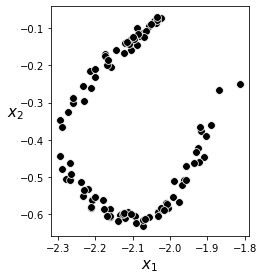

In [ ]:

# import data
X = np.loadtxt(datapath + 'universal_autoencoder_samples.csv',delimiter=',')

# scatter dataset
fig = plt.figure(figsize = (9,4))
gs = gridspec.GridSpec(1,1) 
ax = fig.add_subplot(gs[0],aspect = 'equal'); 
ax.set_xlabel(r'$x_1$',fontsize = 15);ax.set_ylabel(r'$x_2$',fontsize = 15,rotation = 0);
ax.scatter(X[0,:],X[1,:],c = 'k',s = 60,linewidth = 0.75,edgecolor = 'w')
plt.show()

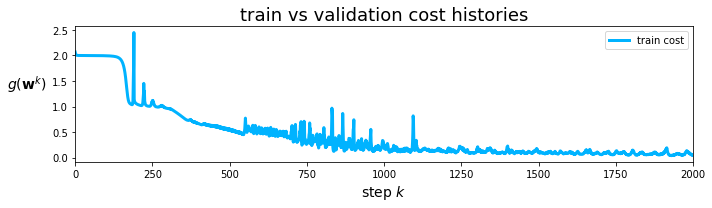

In [ ]:

### initialize encoder network ###
N = 2  # dimension of input
M = 1  # dimension of output
U_1 = 10; U_2 = 10; U_3 = 10;  # number of units per hidden layer

# the list defines our network architecture
layer_sizes = [N, U_1,U_2,U_3,M]

# generate initial weights for our network
w_encoder = initialize_network_weights(layer_sizes, scale = 0.5)

### initialize decoder network ###
N = 1  # dimension of input
M = 2  # dimension of output

# the list defines our network architecture
layer_sizes = [N, U_1,U_2,U_3,M]

# generate initial weights for our network
w_decoder = initialize_network_weights(layer_sizes, scale = 0.5)

# gather initializations for both encoder and encoder, package into single list
w = [w_encoder,w_decoder]

# create instance of library
mylib6 = multi.basic_lib.unsuper_setup.Setup(X)

# perform preprocessing step(s) - especially input normalization
mylib6.preprocessing_steps(normalizer = 'standard')

# split into training and validation sets
mylib6.make_train_val_split(train_portion = 1)

# choose features
mylib6.choose_encoder(layer_sizes = [2,10,10,1],scale = 0.2)
mylib6.choose_decoder(layer_sizes = [1,10,10,2],scale = 0.2)

# choose cost
mylib6.choose_cost(name = 'autoencoder')

# fit an optimization
mylib6.fit(max_its = 2000,alpha_choice = 10**(-1),verbose = False)

# plot cost function history
mylib6.show_histories()

In [ ]:

# plot results
multi.autoencoder_demos.show_encode_decode(X,mylib6,projmap = True,scale = 4.5)

# 13.8

In [ ]:
from sklearn.datasets import fetch_openml
import autograd.numpy as np

In [ ]:
x,y = fetch_openml('mnist_784',version=1,return_X_y=True)
y = np.array([int(v) for v in y])[:,np.newaxis]

In [ ]:
num_sample = 50000
inds = np.random.permutation(y.shape[1])[:num_sample]
x_sample = x.iloc[:,inds].values
y_sample = y[:,inds]
x_sample.shape

(70000, 1)

In [ ]:
np.shape(y_sample)

(70000, 1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1)

In [ ]:
cur_case = multi.basic_lib.super_setup.Setup(x_sample.T,y_sample.T)
cur_case.preprocessing_steps(normalizer = 'standard')
cur_case.make_train_val_split(train_portion = 0.8)
cur_case.choose_cost(name = 'multiclass_softmax')
layer_sizes = [10,10,10,10]
cur_case.choose_features(feature_name = 'multilayer_perceptron',layer_sizes = layer_sizes,activation = 'relu',scale = 0.1)
cur_case.fit(max_its = 10,alpha_choice = 10**(-2),verbose = False,batch_size = 200)
cur_case.choose_features(feature_name = 'multilayer_perceptron_batch_normalized',layer_sizes = layer_sizes,activation = 'relu',scale = 0.1)
cur_case.fit(max_its = 10,alpha_choice = 10**(-1),verbose = False,w_init = cur_case.w_init,batch_size = 200)
labels = ['regular','batch-normalized']
cur_case.show_multirun_histories(start = 0,labels = labels)

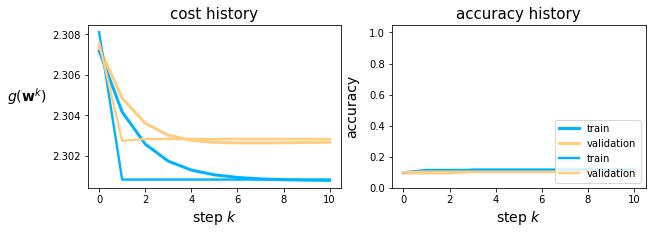

In [ ]:
cur_case.show_histories(start = 0,labels = labels)

# 13.9

In [ ]:

# imports from custom library
import sys
sys.path.append('../../')
from mlrefined_libraries import math_optimization_library as optlib
from mlrefined_libraries import nonlinear_superlearn_library as nonlib
from mlrefined_libraries import multilayer_perceptron_library as multi

# demos for this notebook
regress_plotter = nonlib.nonlinear_regression_demos_multiple_panels
classif_plotter = nonlib.nonlinear_classification_visualizer_multiple_panels
static_plotter = optlib.static_plotter.Visualizer()
basic_runner = nonlib.basic_runner
classif_plotter_crossval = nonlib.crossval_classification_visualizer
datapath = '/content/gdrive/My Drive/sample data/'
# import autograd functionality to bulid function's properly for optimizers
import autograd.numpy as np

# import timer
from datetime import datetime 
import copy
import math
import pickle

# This is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

#%load_ext autoreload
#%autoreload 2

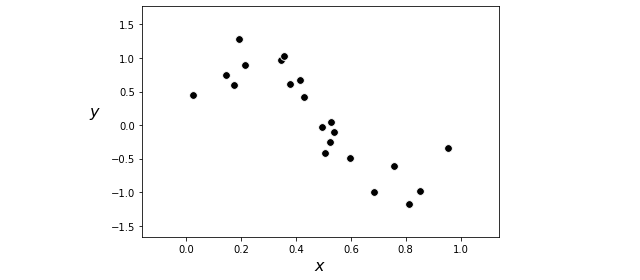

In [ ]:

# load in dataset
csvname = datapath + 'noisy_sin_sample.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

# show data
demo1 = regress_plotter.Visualizer(data)
demo1.plot_data()

# import the v1 library
mylib0 = multi.early_stop_lib.superlearn_setup.Setup(x,y)

# choose features
layer_sizes = [1,10,10,10,1]

# choose features
mylib0.choose_features(name = 'multilayer_perceptron',layer_sizes = layer_sizes,activation = 'tanh')

# choose normalizer
mylib0.choose_normalizer(name = 'standard')

# split into training and testing sets
mylib0.make_train_valid_split(train_portion = 0.66)

# choose cost
mylib0.choose_cost(name = 'least_squares')

# fit an optimization
mylib0.fit(max_its = 20000,alpha_choice = 10**(-1))

# animate the business
frames = 200
demo1 = multi.early_stop_regression_animator.Visualizer(csvname)


starting animation rendering...


MovieWriter stderr:
videos/animation_5.mp4: No such file or directory



CalledProcessError: ignored

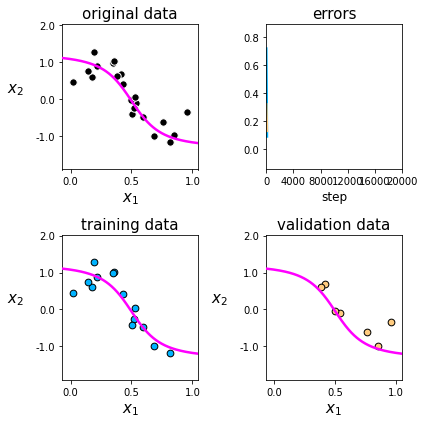

In [ ]:
savepath = 'videos/animation_5.mp4'
demo1.animate_trainval_earlystop(savepath,mylib0,frames,show_history = True,fps=20)

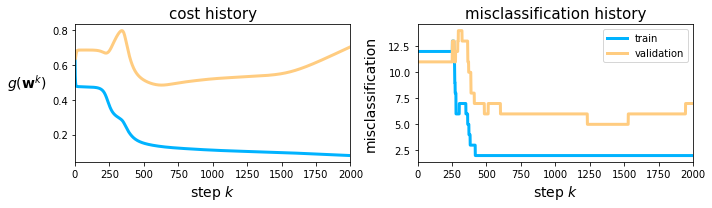

starting animation rendering...


MovieWriter stderr:
videos/animation_5.mp4: No such file or directory



CalledProcessError: ignored

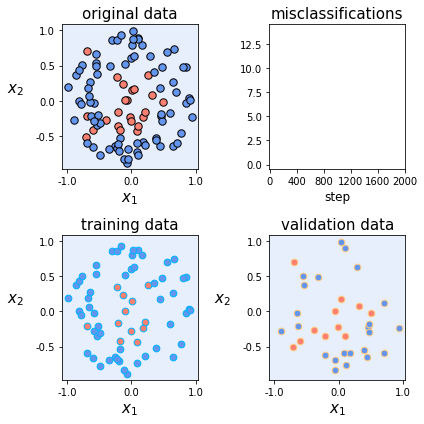

In [ ]:

# load in dataset
csvname = datapath + 'new_circle_data.csv'

data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

demo2 = classif_plotter.Visualizer(csvname)
# demo2.plot_data();

name = datapath + 'early_stopping_weights.p'
init_weights = pickle.load( open(name, "rb" ) )

name = datapath + 'early_stop_test_data.p'
test_data = pickle.load( open(name, "rb" ) )
x_valid =  test_data[:-1,:]
y_valid = test_data[-1:,:] 

name = datapath + 'early_stop_train_data.p'
train_data = pickle.load( open(name, "rb" ) )
x_train =  train_data[:-1,:]
y_train = train_data[-1:,:] 

# load in data
csvname = datapath + 'small_circle_data.csv'

data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

# import the v1 library
mylib1 = multi.early_stop_lib.superlearn_setup.Setup(x,y)

# choose features
layer_sizes = [2,5,1]

# choose features
mylib1.choose_features(name = 'multilayer_perceptron',layer_sizes = layer_sizes,activation = 'tanh')

# choose normalizer
mylib1.choose_normalizer(name = 'standard')

# split into training and testing sets
mylib1.make_train_valid_split(train_portion = 0.66)

# put in saved data
mylib1.x_train = x_train
mylib1.y_train = y_train
mylib1.x_valid = x_valid
mylib1.y_valid = y_valid

# choose cost
mylib1.choose_cost(name = 'softmax',init = init_weights)

# fit an optimization
mylib1.fit(max_its = 2000,alpha_choice = 10**(0))#,init = favorite_color)

# plot cost history
mylib1.show_histories(start = 0)

# load up animator
demo3 = multi.early_stop_classification_animator.Visualizer(csvname)

frames = 200
demo3.animate_trainval_earlystop(savepath,mylib1,frames,fps=20)

# 13.10

In [50]:
# import libraries
import torch
import numpy as np
import matplotlib.pyplot as plt

In [51]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

def create_datasets(batch_size):

    # percentage of training set to use as validation
    valid_size = 0.2

    # convert data to torch.FloatTensor
    transform = transforms.ToTensor()

    # choose the training and test datasets
    train_data = datasets.MNIST(root='data', 
                                train=True,
                                download=True, 
                                transform=transform)

    test_data = datasets.MNIST(root='data',
                               train=False,
                               download=True,
                               transform=transform)

    # obtain training indices that will be used for validation
    num_train = len(train_data)
    indices = list(range(num_train))
    np.random.shuffle(indices)
    split = int(np.floor(valid_size * num_train))
    train_idx, valid_idx = indices[split:], indices[:split]
    
    # define samplers for obtaining training and validation batches
    train_sampler = SubsetRandomSampler(train_idx)
    valid_sampler = SubsetRandomSampler(valid_idx)
    
    # load training data in batches
    train_loader = torch.utils.data.DataLoader(train_data,
                                               batch_size=batch_size,
                                               sampler=train_sampler,
                                               num_workers=0)
    
    # load validation data in batches
    valid_loader = torch.utils.data.DataLoader(train_data,
                                               batch_size=batch_size,
                                               sampler=valid_sampler,
                                               num_workers=0)
    
    # load test data in batches
    test_loader = torch.utils.data.DataLoader(test_data,
                                              batch_size=batch_size,
                                              num_workers=0)
    
    return train_loader, test_loader, valid_loader

In [52]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 10)
        self.dropout = nn.Dropout(0.5)
    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        # add output layer
        x = self.fc3(x)
        return x

# initialize the NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [53]:
# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.Adam(model.parameters())

In [54]:
 !git clone https://github.com/Bjarten/early-stopping-pytorch
 import sys
sys.path.insert(0,'/content/early-stopping-pytorch')
import pytorchtools

fatal: destination path 'early-stopping-pytorch' already exists and is not an empty directory.


In [55]:
# import EarlyStopping
from pytorchtools import EarlyStopping

In [56]:
def train_model(model, batch_size, patience, n_epochs):
    
    # to track the training loss as the model trains
    train_losses = []
    # to track the validation loss as the model trains
    valid_losses = []
    # to track the average training loss per epoch as the model trains
    avg_train_losses = []
    # to track the average validation loss per epoch as the model trains
    avg_valid_losses = [] 
    
    # initialize the early_stopping object
    early_stopping = EarlyStopping(patience=patience, verbose=True)
    
    for epoch in range(1, n_epochs + 1):

        ###################
        # train the model #
        ###################
        model.train() # prep model for training
        for batch, (data, target) in enumerate(train_loader, 1):
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # record training loss
            train_losses.append(loss.item())

        ######################    
        # validate the model #
        ######################
        model.eval() # prep model for evaluation
        for data, target in valid_loader:
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            # record validation loss
            valid_losses.append(loss.item())

        # print training/validation statistics 
        # calculate average loss over an epoch
        train_loss = np.average(train_losses)
        valid_loss = np.average(valid_losses)
        avg_train_losses.append(train_loss)
        avg_valid_losses.append(valid_loss)
        
        epoch_len = len(str(n_epochs))
        
        print_msg = (f'[{epoch:>{epoch_len}}/{n_epochs:>{epoch_len}}] ' +
                     f'train_loss: {train_loss:.5f} ' +
                     f'valid_loss: {valid_loss:.5f}')
        
        print(print_msg)
        
        # clear lists to track next epoch
        train_losses = []
        valid_losses = []
        
        # early_stopping needs the validation loss to check if it has decresed, 
        # and if it has, it will make a checkpoint of the current model
        early_stopping(valid_loss, model)
        
        if early_stopping.early_stop:
            print("Early stopping")
            break
        
    # load the last checkpoint with the best model
    model.load_state_dict(torch.load('checkpoint.pt'))

    return  model, avg_train_losses, avg_valid_losses

In [57]:
batch_size = 500
n_epochs = 100

train_loader, test_loader, valid_loader = create_datasets(batch_size)

# early stopping patience; how long to wait after last time validation loss improved.
patience = 20

model, train_loss, valid_loss = train_model(model, batch_size, patience, n_epochs)

[  1/100] train_loss: 1.17430 valid_loss: 0.40287
Validation loss decreased (inf --> 0.402869).  Saving model ...
[  2/100] train_loss: 0.50565 valid_loss: 0.28715
Validation loss decreased (0.402869 --> 0.287148).  Saving model ...
[  3/100] train_loss: 0.40633 valid_loss: 0.23858
Validation loss decreased (0.287148 --> 0.238577).  Saving model ...
[  4/100] train_loss: 0.35824 valid_loss: 0.20720
Validation loss decreased (0.238577 --> 0.207203).  Saving model ...
[  5/100] train_loss: 0.31951 valid_loss: 0.18695
Validation loss decreased (0.207203 --> 0.186953).  Saving model ...
[  6/100] train_loss: 0.29269 valid_loss: 0.17391
Validation loss decreased (0.186953 --> 0.173907).  Saving model ...
[  7/100] train_loss: 0.27527 valid_loss: 0.15821
Validation loss decreased (0.173907 --> 0.158210).  Saving model ...
[  8/100] train_loss: 0.25960 valid_loss: 0.15047
Validation loss decreased (0.158210 --> 0.150473).  Saving model ...
[  9/100] train_loss: 0.24404 valid_loss: 0.14111
Val

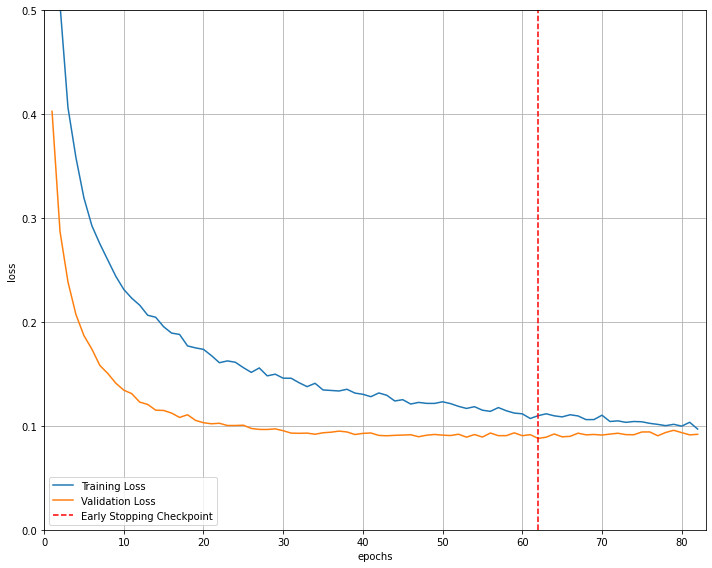

In [58]:
# visualize the loss as the network trained
fig = plt.figure(figsize=(10,8))
plt.plot(range(1,len(train_loss)+1),train_loss, label='Training Loss')
plt.plot(range(1,len(valid_loss)+1),valid_loss,label='Validation Loss')

# find position of lowest validation loss
minposs = valid_loss.index(min(valid_loss))+1 
plt.axvline(minposs, linestyle='--', color='r',label='Early Stopping Checkpoint')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.ylim(0, 0.5) # consistent scale
plt.xlim(0, len(train_loss)+1) # consistent scale
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('loss_plot.png', bbox_inches='tight')